In [184]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import json
import time
from scipy.spatial.distance import pdist, squareform

In [185]:
df = pd.read_csv('Height of Male and Female by Country 2022.csv')
df.head()

,Rank,Country Name,Male Height in Cm,Female Height in Cm,Male Height in Ft,Female Height in Ft
0,1,Netherlands,183.78,170.36,6.03,5.59
1,2,Montenegro,183.30,169.96,6.01,5.58
2,3,Estonia,182.79,168.66,6.00,5.53
3,4,Bosnia and Herzegovina,182.47,167.47,5.99,5.49
4,5,Iceland,182.10,168.91,5.97,5.54


In [186]:
del df['Female Height in Ft']
del df['Male Height in Ft']
del df['Rank']
df.set_index(df['Country Name'],inplace = True)
del df['Country Name']
print(df.head())

                        Male Height in Cm  Female Height in Cm
Country Name                                                  
Netherlands                        183.78               170.36
Montenegro                         183.30               169.96
Estonia                            182.79               168.66
Bosnia and Herzegovina             182.47               167.47
Iceland                            182.10               168.91


In [187]:
# ячейка для выставления значений широты и долготы вместо названия страны по API (NOT USED)



#df['lat'] = 0.0
#df['lng'] = 0.0
# key = '3d2b35dae5444b1a9671eaaf0183dceb'
#
# def get_lat_and_lng_for_country(country):
#     res = requests.get(f'https://api.opencagedata.com/geocode/v1/json?key={key}&q={country}')
#     country_dictionary = json.dumps(res.text)
#     geometry = country_dictionary['results'][0]['geometry']
#     lat,lng = geometry['lat'],geometry['lng']
#     return lat,lng
#
#
# for i in range(df.shape[0]):
#     country = df.iloc[i]['Country Name']
#     print(country)
#     lat,lng = get_lat_and_lng_for_country(country)
#     df.iloc[i,3] = lat
#     df.iloc[i,4] = lng
#     time.sleep(0.1)

In [188]:
def hierarchical_clusterize(X,stop_by='cluster',stop_value=4):

    def stop_process(stop_by,stop_value,cur_clusters,cur_distance):
        if stop_by == 'threshold':
            return stop_value<cur_distance
        elif stop_by=='cluster':
            return cur_clusters == stop_value

    max_num_of_iterations = X.shape[0]-1

    for i in range(max_num_of_iterations):
        distances = pdist(X.values,metric='euclidean')
        dist_matrix = squareform(distances)
        dist_df = pd.DataFrame(data=dist_matrix,columns=X.index)
        dist_df.set_index(dist_df.columns)
        min_distances = dist_df[dist_df > .01].min().sort_values()[:2]
        countries_to_cluster = min_distances.index
        s = X.loc[countries_to_cluster].mean()
        s.name = ','.join(countries_to_cluster)
        X.drop(countries_to_cluster,inplace = True)
        X = X.append(s)
        cur_distance = min_distances.values[0]
        cur_clusters = X.shape[0]
        if stop_process(stop_by,stop_value,cur_clusters,cur_distance):
            break

    return X

In [189]:
clusterized_X = hierarchical_clusterize(df.copy())

In [190]:
clusterized_X.head()

,Male Height in Cm,Female Height in Cm
Country Name,,
"Iran,Kazakhstan,Norway,Guinea,Seychelles,Brazil,Spain,Israel,Turkey,Hungary,Libya,Morocco,North Macedonia,Tunisia,Singapore,Greenland,Azerbaijan,Italy,Uruguay,Portugal,Egypt,Hong Kong,Dominican Republic,North Korea,Argentina,Palestine,Costa Rica,United Arab Emirates,Paraguay,Armenia,Cuba,Venezuela,Qatar,Taiwan,Cyprus,Jordan,Kuwait,Saint Kitts and Nevis,Botswana,Suriname,Albania,Bahamas,Mali,Turkmenistan,Malta,Algeria,Samoa,Bulgaria,Fiji,Iraq,Chile,Mauritius,Japan,Colombia,Nigeria,Oman,Bahrain,Somalia,Uzbekistan,Gabon,Niger,Sao Tome and Principe,Djibouti,Zimbabwe,Mongolia,Palau,Kenya,Saudi Arabia,Ghana,Togo,Republic of the Congo,Kyrgyzstan,Cameroon,Sudan,Haiti,Guyana,Thailand,Syria,Gambia,Vanuatu,Kiribati,Micronesia,Central African Republic,Namibia,Tuvalu,Chad,Burkina Faso",172.968301,161.278960
"Timor-Leste,Solomon Islands,Papua New Guinea,Yemen,Mozambique,Philippines,Cambodia,Marshall Islands,Laos,Guatemala,Nepal,Madagascar,Bangladesh",161.896094,153.963125
"Mauritania,Brunei,India,Indonesia,Myanmar,Peru,Bhutan,Burundi,Ecuador,Pakistan,Maldives,DR Congo,Afghanistan,Bolivia,Sri Lanka,Malawi,Liberia,Rwanda,Zambia,Lesotho,Comoros,Tanzania,Sierra Leone,Malaysia,Ethiopia,Nauru,Guinea-Bissau,Ivory Coast,Benin,Equatorial Guinea,Tajikistan,Angola,Vietnam,Uganda,Eswatini,South Africa,Eritrea,Panama,Mexico,Belize,El Salvador,Nicaragua,Honduras",167.067974,158.265508
"Netherlands,Montenegro,Bosnia and Herzegovina,Estonia,Iceland,Denmark,Slovakia,Slovenia,Lithuania,Czech Republic,Serbia,Latvia,Cook Islands,Belarus,Austria,French Polynesia,Antigua and Barbuda,Andorra,Grenada,Greece,Poland,Bermuda,Germany,Dominica,Sweden,Finland,Ukraine,Croatia,Tonga,Saint Lucia,Tokelau,Saint Vincent and the Grenadines,Barbados,American Samoa,Niue,New Zealand,Romania,United Kingdom,France,Switzerland,Canada,Australia,Ireland,Luxembourg,Belgium,Lebanon,Puerto Rico,Russia,Jamaica,Georgia,Trinidad and Tobago,Moldova,China,South Korea,Senegal,United States",180.421318,167.385381


In [191]:
df['cl'] = 0
for cluster_index,cluster_countries in enumerate(clusterized_X.index):
    counties_array = cluster_countries.split(',')
    df.loc[counties_array,'cl'] = cluster_index

In [192]:
df

,Male Height in Cm,Female Height in Cm,cl
Country Name,,,
Netherlands,183.78,170.36,3
Montenegro,183.30,169.96,3
Estonia,182.79,168.66,3
Bosnia and Herzegovina,182.47,167.47,3
Iceland,182.10,168.91,3
...,...,...,...
Mozambique,164.30,155.42,1
Papua New Guinea,163.10,156.89,1
Solomon Islands,163.07,156.79,1


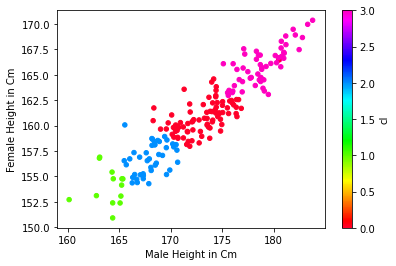

In [193]:
ax = df.plot.scatter('Male Height in Cm', 'Female Height in Cm', c='cl', colormap='gist_rainbow')
ax.set_xlabel('Male Height in Cm')
ax.set_ylabel('Female Height in Cm')
ax.xaxis.get_label().set_visible(True)
ax.tick_params(axis='x', bottom=True, labelbottom=True)
plt.savefig('result.png')

In [178]:
clusterized_X

,Male Height in Cm,Female Height in Cm
Country Name,,
"Iran,Kazakhstan,Norway,Guinea,Seychelles,Brazil,Spain,Israel,Turkey,Hungary,Libya,Morocco,North Macedonia,Tunisia,Singapore,Greenland,Azerbaijan,Italy,Uruguay,Portugal,Egypt,Hong Kong,Dominican Republic,North Korea,Argentina,Palestine,Costa Rica,United Arab Emirates,Paraguay,Armenia,Cuba,Venezuela,Qatar,Taiwan,Cyprus,Jordan,Kuwait,Saint Kitts and Nevis,Botswana,Suriname,Albania,Bahamas,Mali,Turkmenistan,Malta,Algeria,Samoa,Bulgaria,Fiji,Iraq,Chile,Mauritius,Japan,Colombia,Nigeria,Oman,Bahrain,Somalia,Uzbekistan,Gabon,Niger,Sao Tome and Principe,Djibouti,Zimbabwe,Mongolia,Palau,Kenya,Saudi Arabia,Ghana,Togo,Republic of the Congo,Kyrgyzstan,Cameroon,Sudan,Haiti,Guyana,Thailand,Syria,Gambia,Vanuatu,Kiribati,Micronesia,Central African Republic,Namibia,Tuvalu,Chad,Burkina Faso",172.968301,161.278960
"Timor-Leste,Solomon Islands,Papua New Guinea,Yemen,Mozambique,Philippines,Cambodia,Marshall Islands,Laos,Guatemala,Nepal,Madagascar,Bangladesh",161.896094,153.963125
"Mauritania,Brunei,India,Indonesia,Myanmar,Peru,Bhutan,Burundi,Ecuador,Pakistan,Maldives,DR Congo,Afghanistan,Bolivia,Sri Lanka,Malawi,Liberia,Rwanda,Zambia,Lesotho,Comoros,Tanzania,Sierra Leone,Malaysia,Ethiopia,Nauru,Guinea-Bissau,Ivory Coast,Benin,Equatorial Guinea,Tajikistan,Angola,Vietnam,Uganda,Eswatini,South Africa,Eritrea,Panama,Mexico,Belize,El Salvador,Nicaragua,Honduras",167.067974,158.265508
"Netherlands,Montenegro,Bosnia and Herzegovina,Estonia,Iceland,Denmark,Slovakia,Slovenia,Lithuania,Czech Republic,Serbia,Latvia,Cook Islands,Belarus,Austria,French Polynesia,Antigua and Barbuda,Andorra,Grenada,Greece,Poland,Bermuda,Germany,Dominica,Sweden,Finland,Ukraine,Croatia,Tonga,Saint Lucia,Tokelau,Saint Vincent and the Grenadines,Barbados,American Samoa,Niue,New Zealand,Romania,United Kingdom,France,Switzerland,Canada,Australia,Ireland,Luxembourg,Belgium,Lebanon,Puerto Rico,Russia,Jamaica,Georgia,Trinidad and Tobago,Moldova,China,South Korea,Senegal,United States",180.421318,167.385381


In [181]:
for row in clusterized_X.index:
    print(row+'\n\n')

Iran,Kazakhstan,Norway,Guinea,Seychelles,Brazil,Spain,Israel,Turkey,Hungary,Libya,Morocco,North Macedonia,Tunisia,Singapore,Greenland,Azerbaijan,Italy,Uruguay,Portugal,Egypt,Hong Kong,Dominican Republic,North Korea,Argentina,Palestine,Costa Rica,United Arab Emirates,Paraguay,Armenia,Cuba,Venezuela,Qatar,Taiwan,Cyprus,Jordan,Kuwait,Saint Kitts and Nevis,Botswana,Suriname,Albania,Bahamas,Mali,Turkmenistan,Malta,Algeria,Samoa,Bulgaria,Fiji,Iraq,Chile,Mauritius,Japan,Colombia,Nigeria,Oman,Bahrain,Somalia,Uzbekistan,Gabon,Niger,Sao Tome and Principe,Djibouti,Zimbabwe,Mongolia,Palau,Kenya,Saudi Arabia,Ghana,Togo,Republic of the Congo,Kyrgyzstan,Cameroon,Sudan,Haiti,Guyana,Thailand,Syria,Gambia,Vanuatu,Kiribati,Micronesia,Central African Republic,Namibia,Tuvalu,Chad,Burkina Faso


Timor-Leste,Solomon Islands,Papua New Guinea,Yemen,Mozambique,Philippines,Cambodia,Marshall Islands,Laos,Guatemala,Nepal,Madagascar,Bangladesh


Mauritania,Brunei,India,Indonesia,Myanmar,Peru,Bhutan,Burundi,Ecuador,